<a href="https://colab.research.google.com/github/oksusudom/ML-Creadit-Card-Lead-Prediction/blob/main/improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# visualization options
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,6)
rcParams['font.family'] = 'monospace'
rcParams['font.style'] = 'normal'
rcParams['axes.grid'] = True
rcParams['axes.axisbelow'] = True
rcParams['grid.linestyle'] = ':'
rcParams['grid.linewidth'] = 0.2

sns.set_context('poster', font_scale=0.5)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/URCLASS/Section2_Project/credit card/train.csv')

In [5]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


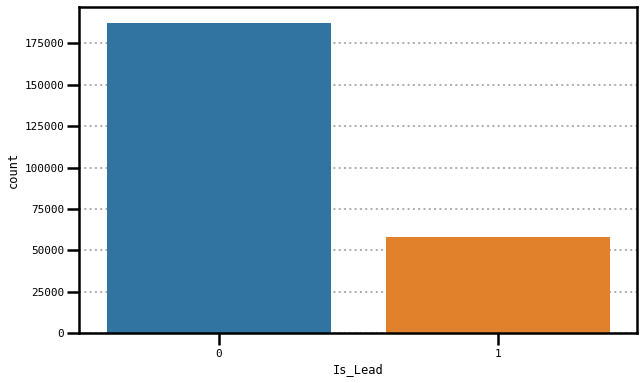

In [6]:
# Target 데이터 분포 확인

sns.countplot(x = df['Is_Lead']);
plt.show() 

# imbalanced 확인

In [7]:
# 전체 고객 중 'Is_Lead'가 0인 고객 (제안에 관심없는 고객) 187,437명
non_target_customers = df[df['Is_Lead'] == 0]
non_target_customers 

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [8]:
# 전체 고객 중 'Is_Lead'가 1인 고객(제안에 관심있는 고객) 58,288명
target_customers = df[df['Is_Lead'] == 1]
target_customers

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1
...,...,...,...,...,...,...,...,...,...,...,...
245697,DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1
245699,MARTXU7T,Male,53,RG254,Other,X2,19,NaN,1141825,Yes,1
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1
245713,BZ7NHPMJ,Female,41,RG277,Self_Employed,X2,13,Yes,898170,Yes,1


In [9]:
# 전체 고객 중 제안에 관심있는 고객의 비율 23.72%
df['Is_Lead'].value_counts(normalize=True) * 100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

In [10]:
# ID column 삭제
df = df.drop(['ID'],axis=1)

df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


## Numerical Features 분포 확인

Age, Vintage, Avg_Account_Balance

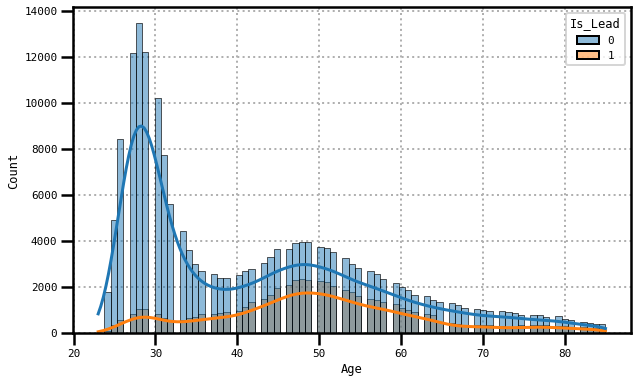

In [11]:
# Target 특성에 따른 Age 분포
sns.histplot(data = df, x = df['Age'], hue = "Is_Lead", kde = True);

- 전체 이용고객 중 20 중반에서 30 중반의 고객이 다수를 차지했다.
- 그 다음으로는 40대 중반에서 50대 중반 고객의 수가 많다.
- 40대 중반 ~ 50대 중반 고객은 다른 나이대에 비해 제안에 관심있는 비율이 높다.

-> 구매력을 갖고 있는 4050 연령층의 과반수 이상이 제안에 관심있음.

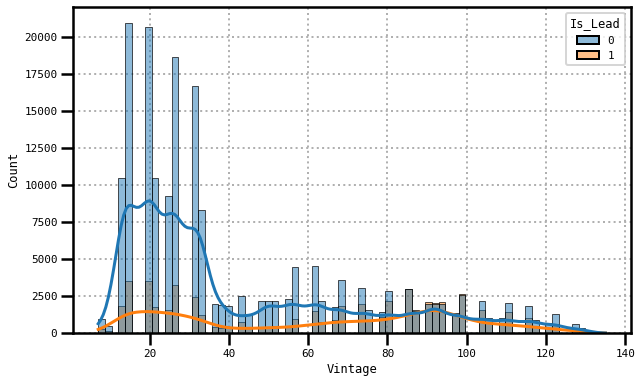

In [12]:
# Target 특성에 따른 Vintage 분포
sns.histplot(data = df, x = df['Vintage'], hue = "Is_Lead", kde = True);

- 대부분의 고객들의 Vintage는 10~40이 많았다.
- 가입 7~8년 차 고객은 제안에 대부분 관심을 갖고 있다.
- 가입 4~5년 차 고객의 제안 관심도는 가장 낮았다.

 -> 가입 4~5년 차의 관심도가 거의 없는 것은 ?


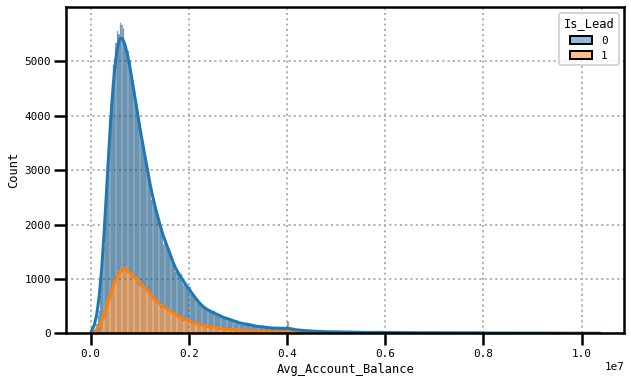

In [13]:
# Target 특성에 따른 Avg_Account_Balance 분포
sns.histplot(data = df, x = df['Avg_Account_Balance'], kde = True, hue = 'Is_Lead', multiple = 'stack');

- Avg_Account_Balance는 제안에 관심이 있는 고객과 없는 고객이 비슷한 분포를 보였다.

In [14]:
print(np.mean(df[df['Is_Lead'] == 1]['Avg_Account_Balance']))
print(np.mean(df[df['Is_Lead'] == 0]['Avg_Account_Balance']))

1210034.0418954159
1103018.015461195


##Categorical Features 분포 확인

Gender, Region Code, Occupation, Channel Code, Credit Product, Is_Active

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


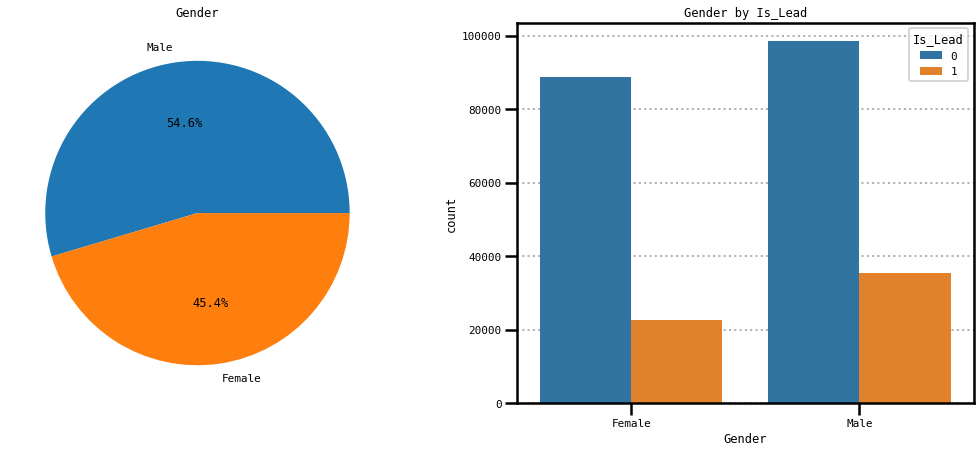

In [15]:
# Gender

fig, ax = plt.subplots(1, 2, figsize=(18,7)) 
# subplot : 한 화면에서 여러 그래프를 나눠서 출력하는 기능 / plt.subplots((행 ,열, 그래프의 크기(가로, 세로)))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[0].set_title('Gender') # 파이 그래프 이름
ax[0].set_ylabel('') # 파이 그래프
 
sns.countplot('Gender', data=df, hue = 'Is_Lead', ax=ax[1])# countplot : 각 카테고리 값별로 데이터가 얼마나 있는지 표시 / countplot(x='column_name', data=dataframe)
ax[1].set_title('Gender by Is_Lead')
plt.show() # 막대 그래프

In [17]:
# Male의 Is_Lead가 1인 비율 26.51%
df[df['Gender'] == 'Male']['Is_Lead'].value_counts(normalize=True) * 100

0    73.484504
1    26.515496
Name: Is_Lead, dtype: float64

In [19]:
# Female의 Is_Lead가 1인 비율 20.35%
df[df['Gender'] == 'Female']['Is_Lead'].value_counts(normalize=True) * 100

0    79.641884
1    20.358116
Name: Is_Lead, dtype: float64

- 남성의 제안 관심 비율 26.51%

- 여성의 제안 관심 비율 20.35%

성별에 따른 제안 관심은 큰 차이가 없다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


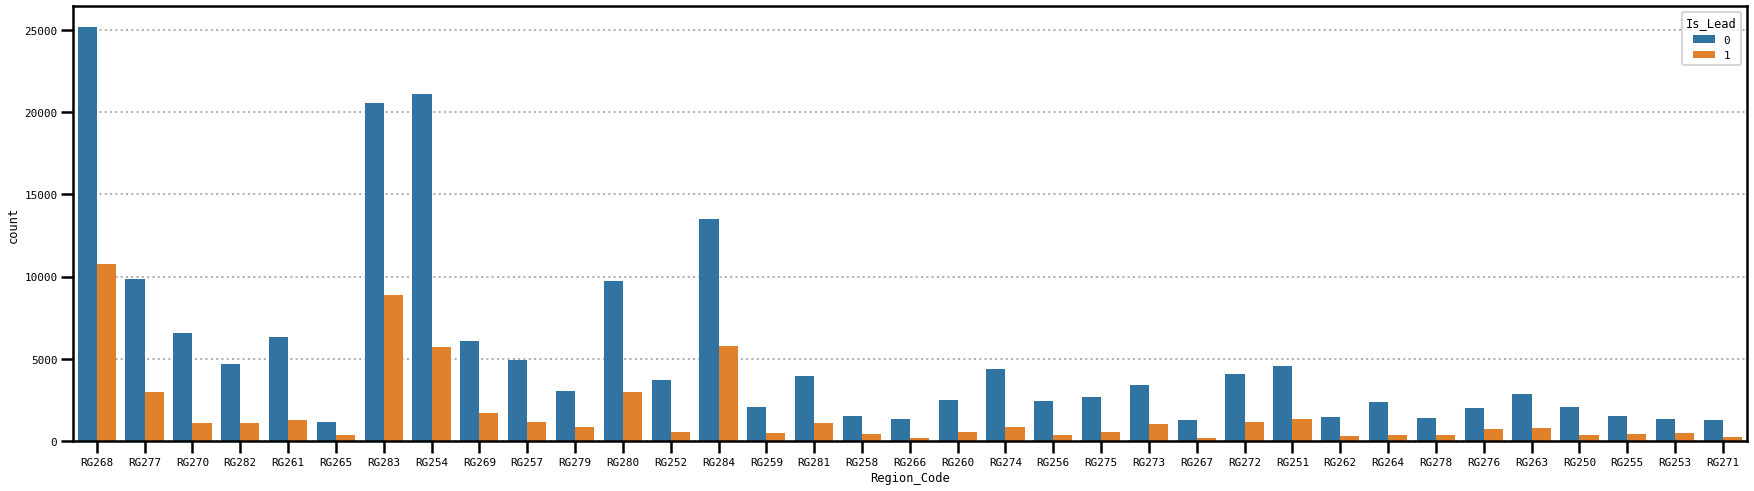

In [20]:
# Region_Code

plt.figure(figsize = (30,8))
sns.countplot('Region_Code', data=df, hue = 'Is_Lead')# countplot : 각 카테고리 값별로 데이터가 얼마나 있는지 표시 / countplot(x='column_name', data=dataframe)
ax[0].set_title('Region_Code by Is_Lead')
plt.show() # 막대 그래프

In [27]:
df[df['Region_Code'] == 'RG268']['Is_Lead'].value_counts(normalize=True) * 100

0    70.020037
1    29.979963
Name: Is_Lead, dtype: float64

In [28]:
df[df['Region_Code'] == 'RG283']['Is_Lead'].value_counts(normalize=True) * 100

0    69.795349
1    30.204651
Name: Is_Lead, dtype: float64

In [30]:
df[df['Region_Code'] == 'RG284']['Is_Lead'].value_counts(normalize=True) * 100

0    69.89648
1    30.10352
Name: Is_Lead, dtype: float64

In [66]:
df.groupby(['Region_Code', 'Is_Lead']).size().unstack(fill_value=0)

Is_Lead,0,1
Region_Code,,
RG250,2103,393
RG251,4569,1381
RG252,3694,592
RG253,1377,481
RG254,21127,5713
RG255,1549,469
RG256,2446,401
RG257,4931,1170
RG258,1521,430


In [67]:
region_groups = df.groupby('Region_Code')

region_groups.mean()['Is_Lead'].sort_values(ascending=False)

Region_Code
RG283    0.302047
RG284    0.301035
RG268    0.299800
RG276    0.277858
RG253    0.258881
RG265    0.258732
RG273    0.237714
RG280    0.235538
RG255    0.232408
RG251    0.232101
RG277    0.231951
RG279    0.225604
RG263    0.221861
RG269    0.221671
RG258    0.220400
RG272    0.219916
RG278    0.219539
RG281    0.218732
RG254    0.212854
RG259    0.193735
RG282    0.192143
RG257    0.191772
RG260    0.190997
RG262    0.180649
RG271    0.169261
RG261    0.167955
RG275    0.167334
RG274    0.164964
RG250    0.157452
RG267    0.148965
RG270    0.144301
RG256    0.140850
RG266    0.139417
RG252    0.138124
RG264    0.137129
Name: Is_Lead, dtype: float64

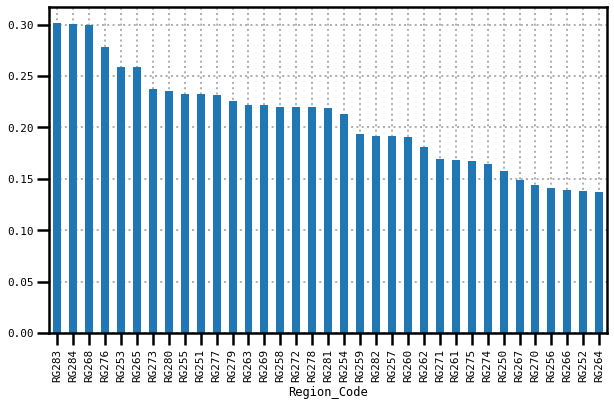

In [69]:
region_groups.mean()['Is_Lead'].sort_values(ascending=False).plot.bar();

- Region Code 중 Is_Lead가 '1'인 고객 비율이 높은 곳은 다른 곳과 어떤 차이가 있는지 확인해봐야한다.



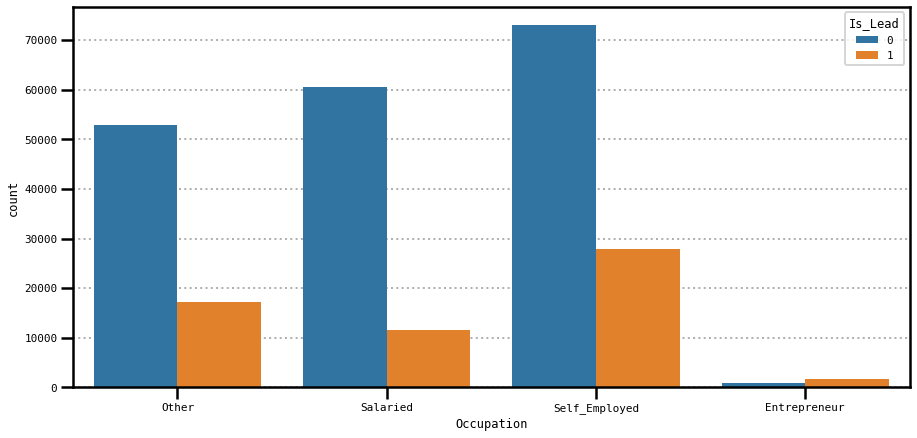

In [21]:
# Occupation

plt.subplots(figsize= (15, 7))
sns.countplot(x = 'Occupation', hue='Is_Lead', data=df);

In [22]:
# Other 
df[df['Occupation'] == 'Other']['Is_Lead'].value_counts(normalize=True) * 100

0    75.504824
1    24.495176
Name: Is_Lead, dtype: float64

In [23]:
# Salaried
df[df['Occupation'] == 'Salaried']['Is_Lead'].value_counts(normalize=True) * 100

0    84.033112
1    15.966888
Name: Is_Lead, dtype: float64

In [24]:
# Self_Employed
df[df['Occupation'] == 'Self_Employed']['Is_Lead'].value_counts(normalize=True) * 100

0    72.403505
1    27.596495
Name: Is_Lead, dtype: float64

In [25]:
# Entrepreneur
df[df['Occupation'] == 'Entrepreneur']['Is_Lead'].value_counts(normalize=True) * 100

1    66.066742
0    33.933258
Name: Is_Lead, dtype: float64

 Occupation 중

 - 'Other'의 제안 관심 비율 24.49%

 - 'Salaried'의 제안 관심 비율 15.96%

 - 'Self_Employed'의 제안 관심 비율 27.59%

 - 'Entrepreneur'의 제안 관심 비율 66.06%


 Entrepreneur의 66%가 제안에 관심이 많다. 하지만 절대 수가 적기 때문에 전체 비율에서 미치는 영향은 낮다다.
 그 다음으로는 Self_Employed와 Other가 비슷한 비율을 보였고, Salaried의 관심 비율은 낮았다.

 사업가, 자영업자가 관심이 높은 제안이다.

 Salaried에 해당하는 사람들에게 어떤 부분이 매력적이지 못한 제안인지 파악해봐야한다.

 혹은 사업가, 자영업자에게 무엇이 매력적이었는지 파악하고 더 많은 관심 비율을 확보하기 위한 기획을 한다.

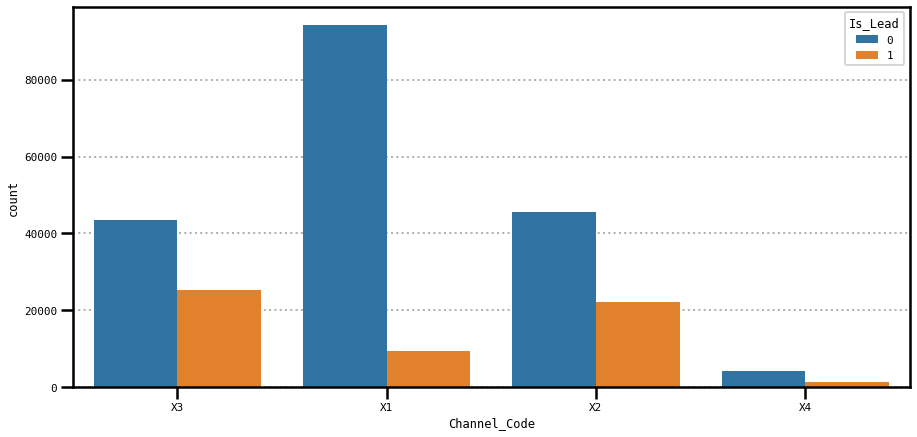

In [26]:
# Channel_Code

plt.subplots(figsize= (15, 7))
sns.countplot(x = 'Channel_Code', hue='Is_Lead', data=df);

In [70]:
df[df['Channel_Code'] == 'X1']['Is_Lead'].value_counts(normalize=True) * 100

0    90.857903
1     9.142097
Name: Is_Lead, dtype: float64

In [71]:
df[df['Channel_Code'] == 'X2']['Is_Lead'].value_counts(normalize=True) * 100

0    67.210525
1    32.789475
Name: Is_Lead, dtype: float64

In [72]:
df[df['Channel_Code'] == 'X3']['Is_Lead'].value_counts(normalize=True) * 100

0    63.297532
1    36.702468
Name: Is_Lead, dtype: float64

In [73]:
df[df['Channel_Code'] == 'X4']['Is_Lead'].value_counts(normalize=True) * 100

0    75.219968
1    24.780032
Name: Is_Lead, dtype: float64

 - X2, X3의 제안 관심 비율은 각각 32.78%, 36,70%로 나왔다.
 - X1의 관심 비율이 낮은 이유에 대해서 확인해봐야한다. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


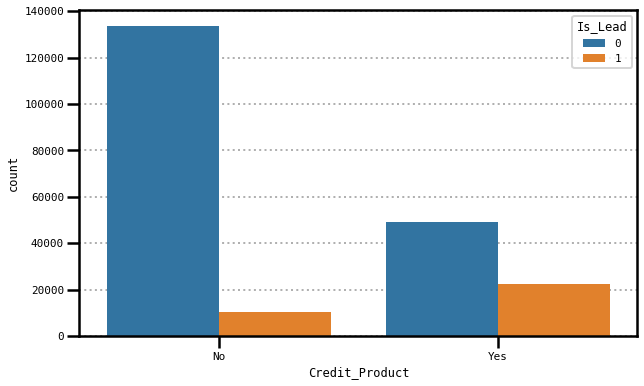

In [74]:
# Credit_Product
sns.countplot('Credit_Product', data=df, hue = 'Is_Lead');

In [75]:
df[df['Credit_Product'] == 'Yes']['Is_Lead'].value_counts(normalize=True) * 100

0    68.504921
1    31.495079
Name: Is_Lead, dtype: float64

In [76]:
df[df['Credit_Product'] == 'No']['Is_Lead'].value_counts(normalize=True) * 100

0    92.64116
1     7.35884
Name: Is_Lead, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


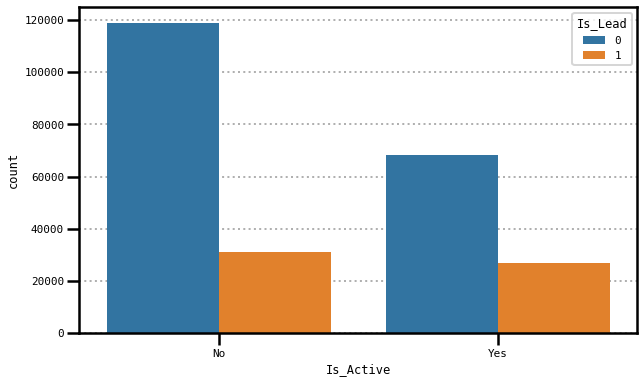

In [ ]:
# Is_Active
sns.countplot('Is_Active', data=df, hue = 'Is_Lead');

In [ ]:
df[df['Is_Active'] == 'Yes']['Is_Lead'].value_counts(normalize=True) * 100

0    71.703254
1    28.296746
Name: Is_Lead, dtype: float64

In [ ]:
df[df['Is_Active'] == 'No']['Is_Lead'].value_counts(normalize=True) * 100

0    79.184909
1    20.815091
Name: Is_Lead, dtype: float64

In [ ]:
!pip install scipy

from scipy import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


가설 1 

관심있는 고객들의 평균 Vintage가 관심없는 고객의 평균 Vintage보다 유의미하게 높을 것이다.

In [ ]:
target_Vintage = df[df['Is_Lead'] == 1]['Vintage']
target_Vintage

16        97
17        15
20        19
29        56
34        87
          ..
245690    91
245693    74
245697    50
245709    15
245713    13
Name: Vintage, Length: 33313, dtype: int64

In [ ]:
plt.figure(figsize = (40,6))
sns.countplot(x = target_Vintage);

NameError: ignored

<Figure size 2880x432 with 0 Axes>

In [ ]:
non_target_Vintage = df[df['Is_Lead'] == 0]['Vintage']
non_target_Vintage

0         43
1         32
2         26
3         19
4         33
          ..
245719    13
245721    15
245722    13
245723    31
245724    21
Name: Vintage, Length: 183087, dtype: int64

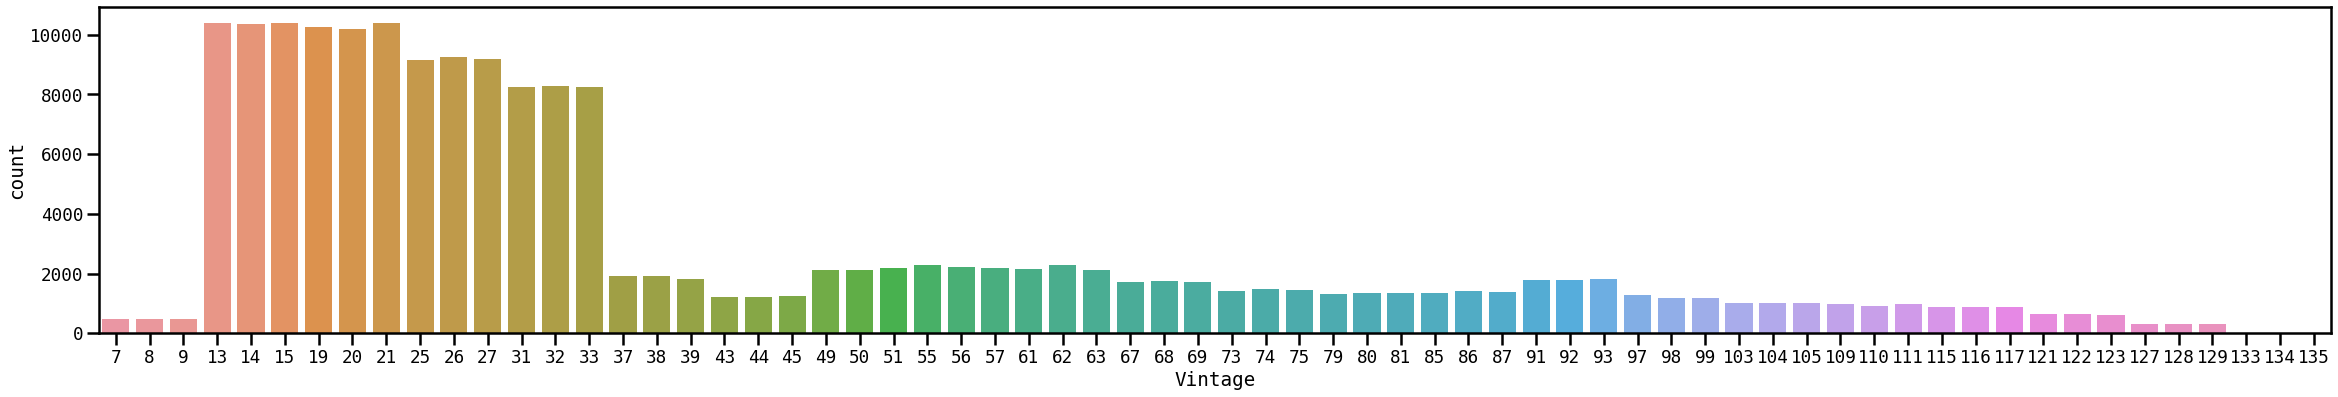

In [ ]:
plt.figure(figsize = (40,6))
sns.countplot(x= non_target_Vintage);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


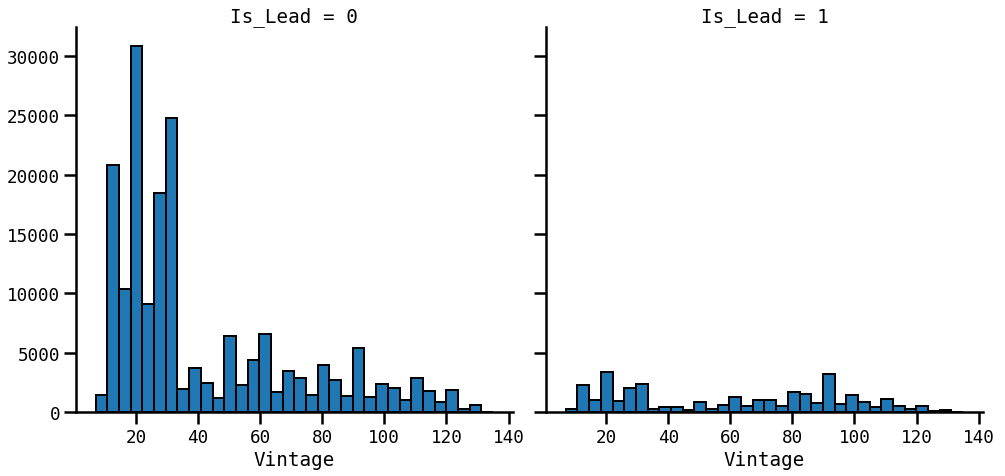

In [ ]:
bins = np.linspace(df.Vintage.min(), df.Vintage.max(), 35)
plot1 = sns.FacetGrid(df, col = "Is_Lead", palette = 'Set1', col_wrap=2, size = 7)
plot1.map(plt.hist, 'Vintage', bins=bins, ec='k')

plot1.add_legend()
plt.show();

In [ ]:
# 두 그룹의 비율이 큰 차이가 나지 않기 때문에 그룹의 분산이 차이가 나지 않는다고 판단.
print(np.var(target_Vintage))

print(np.var(non_target_Vintage))

1193.689012866215
878.2364622836806


In [ ]:
stats.ttest_ind(target_Vintage, non_target_Vintage)

Ttest_indResult(statistic=106.79317277167486, pvalue=0.0)

H0 => µ1 = µ2

귀무가설 : 관심있는 고객들의 평균 Vintag는 관심없는 고객의 평균 Vintage와 차이가 없을 것이다.

HA => µ1 ≠µ2 

대안가설 : 관심있는 고객들의 평균 Vintage가 관심없는 고객의 평균 Vintage보다 유의미하게 높을 것이다.

신뢰도 95%

p-value가 0.05보다 낮기 때문에 귀무가설을 기각하고 대안가설을 채택한다.

-----
가설2

관심있는 고객들의 평균 'Avg_Account_Balance'가 관심없는 고객들의 평균  'Avg_Account_Balance'보다 유의미하게 낮을 것이다.

In [ ]:
target_AAB = df[df['Is_Lead'] == 1]['Avg_Account_Balance']
target_AAB

16        2282502
17        2384692
20        1001650
29        1056910
34        1684182
           ...   
245690     766548
245693    1122023
245697     551203
245709     608110
245713     898170
Name: Avg_Account_Balance, Length: 33313, dtype: int64

In [ ]:
non_target_AAB = df[df['Is_Lead'] == 0]['Avg_Account_Balance']
non_target_AAB

0         1045696
1          581988
2         1484315
3          470454
4          886787
           ...   
245719     354665
245721     862952
245722     670659
245723     407504
245724    1129276
Name: Avg_Account_Balance, Length: 183087, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


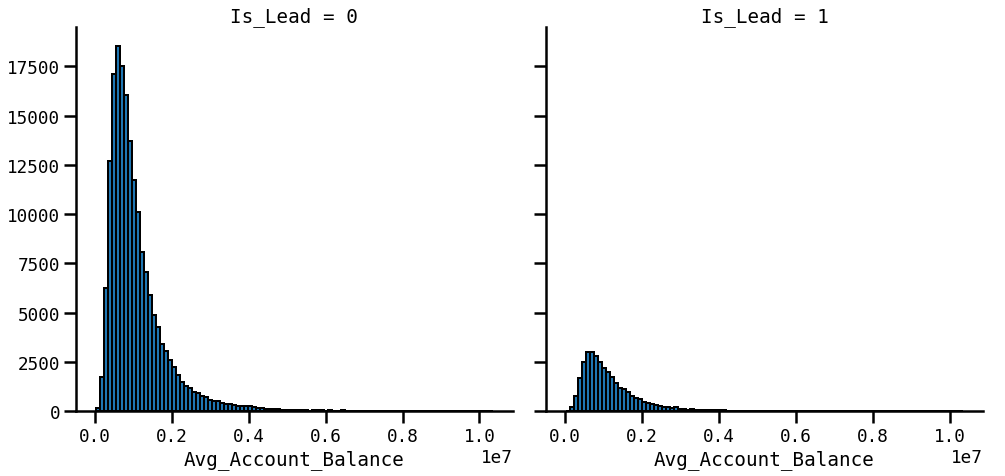

In [ ]:
bins2 = np.linspace(df.Avg_Account_Balance.min(), df.Avg_Account_Balance.max(), 100)
plot2 = sns.FacetGrid(df, col = "Is_Lead", palette = 'Set1', col_wrap=2, size = 7)
plot2.map(plt.hist, 'Avg_Account_Balance', bins=bins2, ec='k')

plot2.add_legend()
plt.show();

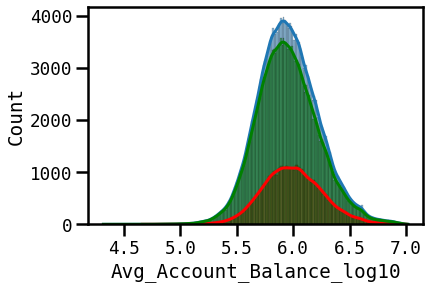

In [ ]:
df['Avg_Account_Balance_log10'] = np.log10(df['Avg_Account_Balance'])

sns.histplot(df['Avg_Account_Balance_log10'], kde = True);
sns.histplot(df[df['Is_Lead'] == 1]['Avg_Account_Balance_log10'], kde = True, color="red");
sns.histplot(df[df['Is_Lead'] == 0]['Avg_Account_Balance_log10'], kde = True, color="green");

In [ ]:
print(np.var(target_AAB))

print(np.var(non_target_AAB))

753058638202.9728
715425557057.6074


In [ ]:
stats.ttest_ind(target_AAB, non_target_AAB)

Ttest_indResult(statistic=19.803560224508875, pvalue=3.3154586350694674e-87)

H0 => µ1 = µ2

귀무가설 : 관심있는 고객들의 평균 Avg_Account_Balance는 관심없는 고객의 평균 Avg_Account_Balance와 차이가 없을 것이다.

HA => µ1 ≠µ2 

대안가설 : 관심있는 고객들의 평균 Avg_Account_Balance가 관심없는 고객의 평균 Avg_Account_Balance보다 유의미하게 높을 것이다.

신뢰도 95%

p-value가 0.05보다 낮기 때문에 귀무가설을 기각하고 대안가설을 채택한다.

가설 3

특정 'Occupation'이 추천 신용카드에 관심있을 가능성이 유의미하게 높을 것이다.

In [ ]:
target_customers[target_customers['Occupation'] == 'Other']

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1
34,FXPTJYP7,Male,67,RG268,Other,X1,87,Yes,1684182,No,1
53,JLHDNBUG,Male,60,RG268,Other,X3,104,Yes,1681503,No,1
212,COJX7JA2,Male,50,RG254,Other,X3,45,No,2019160,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
245538,GXCOCBZG,Male,56,RG283,Other,X3,14,Yes,1251963,No,1
245594,FQNSJGQT,Female,54,RG268,Other,X1,87,No,1338017,No,1
245622,XCAGPM7X,Male,67,RG277,Other,X3,110,Yes,603838,No,1
245637,NNVMXGU7,Male,69,RG268,Other,X2,33,Yes,529781,No,1


In [ ]:
target_Occupation = df[df['Is_Lead'] == 1]['Occupation']
target_Occupation

16                Other
17                Other
20        Self_Employed
29        Self_Employed
34                Other
              ...      
245690    Self_Employed
245693            Other
245697         Salaried
245709    Self_Employed
245713    Self_Employed
Name: Occupation, Length: 33313, dtype: object

In [ ]:
non_tareget_Occupation = df[df['Is_Lead'] == 0]['Occupation']
non_tareget_Occupation

0                 Other
1              Salaried
2         Self_Employed
3              Salaried
4              Salaried
              ...      
245719         Salaried
245721         Salaried
245722         Salaried
245723         Salaried
245724         Salaried
Name: Occupation, Length: 183087, dtype: object

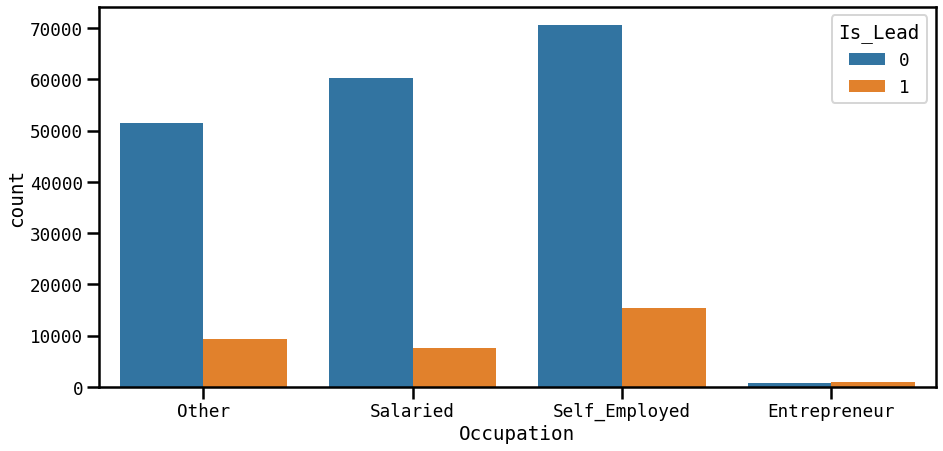

In [ ]:
plt.subplots(figsize= (15, 7))
sns.countplot(x = 'Occupation', hue='Is_Lead', data=df);

16            Other
17            Other
20    Self_Employed
29    Self_Employed
34            Other
Name: Occupation, dtype: object